# SUP ML 1 - PREPROCESSING

# Librerias

In [ ]:
try:
    import unidecode
except ImportError:
    !pip install unidecode
    import unidecode

In [ ]:
# Datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from unidecode import unidecode
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# inhabilita warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas

# Importar train data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_inicial = pd.read_csv('/content/drive/MyDrive/DSC N°1123 - Entregable 2 - Julià_Tizzard_Quenti/data/telecom_churn_TRAINTEST.csv')

In [ ]:
df = df_inicial.copy()

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

rev     mou  totmrc      da  ovrmou  ovrrev  vceovr  datovr  roam  \
0  23.9975  219.25  22.500  0.2475    0.00     0.0     0.0     0.0   0.0   
1  57.4925  482.75  37.425  0.2475   22.75     9.1     9.1     0.0   0.0   
2  16.9900   10.25  16.990  0.0000    0.00     0.0     0.0     0.0   0.0   
3  38.0000    7.50  38.000  0.0000    0.00     0.0     0.0     0.0   0.0   
4  55.2300  570.50  71.980  0.0000    0.00     0.0     0.0     0.0   0.0   

   change_mou  change_rev  drop_vce  drop_dat  blck_vce  blck_dat   unan_vce  \
0     -157.25    -18.9975  0.666667       0.0  0.666667       0.0   6.333333   
1      532.25     50.9875  8.333333       0.0  1.000000       0.0  61.333333   
2       -4.25      0.0000  0.333333       0.0  0.000000       0.0   2.666667   
3       -1.50      0.0000  0.000000       0.0  0.000000       0.0   0.000000   
4       38.50      0.0000  9.666667       0.0  0.666667       0.0  77.000000   

   unan_dat    plcd_vce  plcd_dat   recv_vce  recv_sms    comp_vce  comp_dat  \
0       0.0   52.333333       0.0  42.333333       0.0   45.000000       0.0   
1       0.0  263.333333       0.0  69.000000       0.0  193.333333       0.0   
2       0.0    9.000000       0.0   0.333333       0.0    6.000000       0.0   
3       0.0    3.666667       0.0   1.333333       0.0    3.666667       0.0   
4       0.0  222.333333       0.0  94.666667       0.0  137.000000       0.0   

   custcare   ccrndmou     cc_mou   inonemin  threeway    mou_cvce  mou_cdat  \
0  0.000000   0.000000   0.000000  18.000000  0.000000   90.643333       0.0   
1  1.666667   6.333333   5.463333  53.000000  0.333333  189.396667       0.0   
2  0.000000   0.000000   0.000000   0.333333  0.000000    5.426667       0.0   
3  0.000000   0.000000   0.000000   1.333333  0.000000    8.410000       0.0   
4  8.666667  15.000000  11.076667  66.000000  0.000000  285.233333       0.0   

     mou_rvce  owylis_vce  mouowylisv  iwylis_vce  mouiwylisv   peak_vce  \
0   97.176667    0.000000    0.000000    0.000000    0.000000  58.000000   
1   55.280000   46.333333   24.216667    6.333333    3.696667  83.666667   
2    0.000000    0.000000    0.000000    0.000000    0.000000   5.000000   
3    0.413333    0.333333    0.256667    0.000000    0.000000   1.333333   
4  106.330000   14.666667   10.816667    0.666667    0.366667  97.333333   

   peak_dat    mou_peav  mou_pead     opk_vce  opk_dat    mou_opkv  mou_opkd  \
0       0.0  132.600000       0.0   24.000000      0.0   55.220000       0.0   
1       0.0   75.333333       0.0  157.000000      0.0  169.343333       0.0   
2       0.0    5.193333       0.0    1.000000      0.0    0.233333       0.0   
3       0.0    3.380000       0.0    3.666667      0.0    5.450000       0.0   
4       0.0  173.476667       0.0   90.333333      0.0  218.086667       0.0   

    drop_blk     attempt    complete  callfwdv  callwait  churn  months  \
0   1.333333   52.333333   45.000000       0.0  0.333333      1      61   
1   9.333333  263.333333  193.333333       0.0  5.666667      0      56   
2   0.333333    9.000000    6.000000       0.0  0.000000      1      58   
3   0.000000    3.666667    3.666667       0.0  0.000000      0      60   
4  10.333333  222.333333  137.000000       0.0  0.000000      0      57   

   uniqsubs  actvsubs new_cell crclscod asl_flag  totcalls       totmou  \
0         2         1        U        A        N      1652   4228.00000   
1         1         1        N       EA        N     14654  26400.00000   
2         1         1        Y        C        N      7903  24385.05333   
3         1         1        Y        B        N      1502   3065.00000   
4         1         1        Y        A        N      4485  14028.00000   

    totrev   adjrev    adjmou  adjqty  avgrev  avgmou  avgqty  avg3mou  \
0  1504.62  1453.44   4085.00    1602   29.66   83.37   32.69      272   
1  2851.68  2833.88  26367.00   14624   51.53  479.40  265.89      305   
2  2155.91  1934.47  24303.05    7888   34.54

In [ ]:
desc_vars = pd.read_csv('/content/drive/MyDrive/DSC N°1123 - Entregable 2 - Julià_Tizzard_Quenti/data/variable_dictionary.csv')
print(desc_vars.shape)
desc_vars

(100, 2)


Variable                                        Description
0                rev               Mean monthly revenue (charge amount)
1                mou              Mean number of monthly minutes of use
2             totmrc                Mean total monthly recurring charge
3                 da            Mean number of directory assisted calls
4             ovrmou                        Mean overage minutes of use
5             ovrrev                               Mean overage revenue
6             vceovr                      Mean revenue of voice overage
7             datovr                       Mean revenue of data overage
8               roam                       Mean number of roaming calls
9         change_mou   Percentage change in monthly minutes of use v...
10        change_rev   Percentage change in monthly revenue vs previ...
11          drop_vce        Mean number of dropped (failed) voice calls
12          drop_dat         Mean number of dropped (failed) data calls
13          blck_vce        Mean number of blocked (failed) voice calls
14          blck_dat         Mean number of blocked (failed) data calls
15          unan_vce              Mean number of unanswered voice calls
16          unan_dat               Mean number of unanswered data calls
17          plcd_vce        Mean number of attempted voice calls placed
18          plcd_dat         Mean number of attempted data calls placed
19          recv_vce                Mean number of received voice calls
20          recv_sms                        Mean number of received sms
21          comp_vce               Mean number of completed voice calls
22          comp_dat                Mean number of completed data calls
23          custcare                 Mean number of customer care calls
24          ccrndmou   Mean rounded minutes of use of customer care ...
25            cc_mou   Mean unrounded minutes of use of customer car...
26          inonemin   Mean number of inbound calls less than one mi...
27          threeway                     Mean number of three way calls
28          mou_cvce   Mean unrounded minutes of use of completed vo...
29          mou_cdat   Mean unrounded minutes of use of completed da...
30          mou_rvce   Mean unrounded minutes of use of received voi...
31        owylis_vce   Mean number of outbound wireless to wireless ...
32        mouowylisv   Mean unrounded minutes of use of outbound wir...
33        iwylis_vce   Mean number of inbound wireless to wireless v...
34        mouiwylisv   Mean unrounded minutes of use of inbound wire...
35          peak_vce   Mean number of inbound and outbound peak voic...
36          peak_dat                     Mean number of peak data calls
37          mou_peav   Mean unrounded minutes of use of peak voice c...
38          mou_pead   Mean unrounded minutes of use of peak data calls
39           opk_vce                Mean number of off-peak voice calls
40           opk_dat                 Mean number of off-peak data calls
41          mou_opkv   Mean unrounded minutes of use of off-peak voi...
42          mou_opkd   Mean unrounded minutes of use of off-peak dat...
43          drop_blk            Mean number of dropped or blocked calls
44           attempt                     Mean number of attempted calls
45          complete                     Mean number of completed calls
46          callfwdv               Mean number of call forwarding calls
47          callwait                  Mean number of call waiting calls
48             churn   Instance of churn between 31-60 days after ob...
49            months                  Total number of months in service
50          uniqsubs      Number of unique subscribers in the household
51          actvsubs          Number of active subscribers in household
52          new_cell                                New cell phone user
53          crclscod                                  Credit class code
54          asl_flag                             Acc

# EDA: Analisis Exploratorio

In [ ]:
df.describe()

rev           mou        totmrc            da        ovrmou  \
count  89866.000000  89866.000000  89866.000000  89866.000000  89866.000000   
mean      58.312895    504.277946     45.880669      0.877813     40.798976   
std       46.084103    516.170057     23.370435      2.173665     96.970619   
min       -5.862500      0.000000    -26.915000      0.000000      0.000000   
25%       33.027500    148.500000     30.000000      0.000000      0.000000   
50%       47.667500    349.000000     44.990000      0.247500      2.500000   
75%       70.193750    689.000000     59.990000      0.742500     41.250000   
max     3843.262500  12206.750000    409.990000    159.390000   4320.750000   

             ovrrev        vceovr        datovr          roam    change_mou  \
count  89866.000000  89866.000000  89866.000000  89866.000000  89405.000000   
mean      13.289932     13.046046      0.240786      1.308197    -13.786987   
std       30.123282     29.719581      3.012631     15.374215    271.624916   
min        0.000000      0.000000      0.000000      0.000000  -3875.000000   
25%        0.000000      0.000000      0.000000      0.000000    -85.750000   
50%        0.900000      0.600000      0.000000      0.000000     -6.500000   
75%       13.912500     13.562500      0.000000      0.257500     61.250000   
max     1102.400000    896.087500    423.540000   3685.200000  31219.250000   

         change_rev      drop_vce      drop_dat      blck_vce      blck_dat  \
count  89405.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean      -1.074666      5.769639      0.037837      3.999448      0.019737   
std       50.565668      8.673272      0.885448     10.603489      0.699317   
min    -1107.740000      0.000000      0.000000      0.000000      0.000000   
25%       -7.212500      0.666667      0.000000      0.000000      0.000000   
50%       -0.315000      3.000000      0.000000      1.000000      0.000000   
75%        1.537500      7.333333      0.000000      3.666667      0.000000   
max     9963.657500    232.666667    207.333333    385.333333    122.333333   

           unan_vce      unan_dat      plcd_vce      plcd_dat      recv_vce  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean      26.843561      0.027811    141.375341      0.805435     53.713298   
std       37.315217      0.501246    155.486573      8.455179     85.537833   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.666667      0.000000     36.666667      0.000000      5.000000   
50%       15.333333      0.000000     98.000000      0.000000     25.666667   
75%       34.666667      0.000000    193.666667      0.000000     69.333333   
max      848.666667     81.666667   2289.000000    733.666667   3369.333333   

           recv_sms      comp_vce      comp_dat      custcare      ccrndmou  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean       0.047781    106.483091      0.720050      1.648754      4.344852   
std        2.176283    116.845898      7.679230      5.148484     12.141729   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000     27.333333      0.000000      0.000000      0.000000   
50%        0.000000     74.000000      0.000000      0.000000      0.000000   
75%        0.000000    146.666667      0.000000      1.333333      3.666667   
max      517.333333   1894.333333    559.333333    675.333333    861.333333   

             cc_mou      inonemin      threeway      mou_cvce      mou_cdat  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean       3.444618     28.909037      0.269522    221.363949      1.689888   
std       10.049161     54.960177      1.003104    257.220079     21.905864   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      2.333333      0.000000     46.842500

## Distribución del target

In [ ]:
target = 'churn'
features = df.columns[df.columns!=target]

X = features
y = df[target]

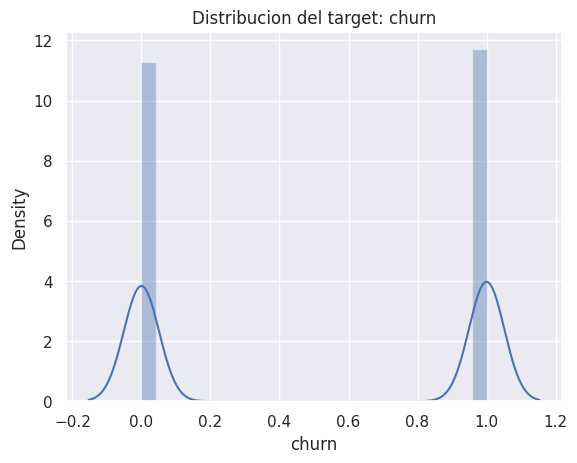

In [ ]:
#Distribucion target
sns.distplot(y)
plt.title('Distribucion del target: '+ target)
plt.show()

## Analisis Univariable

In [ ]:
# Clasificar variables en numéricas y categóricas
var_cat = df.select_dtypes(include=['object']).columns.tolist()
var_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print('Total var_cat:', len(var_cat), '   Total var_num:', len(var_num), '    Total variables:', len(var_cat)+len(var_num))

Total var_cat: 21    Total var_num: 79     Total variables: 100


In [ ]:
# Para las visualizaciones utilizamos una muestra random del df
df_sample=df.sample(1000, random_state=42)


### *Variables Categóricas*

In [ ]:
# Para las variables categóricas value_counts
for col in var_cat:
  print(df[col].value_counts(),'\n',)

U    58812
Y    18114
N    13074
Name: new_cell, dtype: int64 

AA    34152
A     15602
BA    11270
CA     7389
EA     5521
B      3743
DA     3201
ZA     3177
C      1418
A2      771
U       429
E       330
E4      305
GA      265
D       244
G       236
I       231
JF      192
Z       187
J       169
M       153
C2      152
D4      107
Z4       94
K        93
W        84
V1       70
U1       56
EM       46
B2       42
Y        38
EC       32
O        24
CY       21
E2       19
CC       19
D5       16
C5       14
IF       14
ZY       12
Z1       11
Z5        8
H         8
TP        5
D2        5
GY        5
L         4
EF        4
Z2        4
A3        3
P1        2
S         1
V         1
ZF        1
Name: crclscod, dtype: int64 

N    79401
Y    10599
Name: asl_flag, dtype: int64 

S    29203
U    20935
C    15244
T    13705
R     4376
Name: prizm_social_one, dtype: int64 

NEW YORK CITY AREA               10293
DC/MARYLAND/VIRGINIA AREA         5924
MIDWEST AREA                    

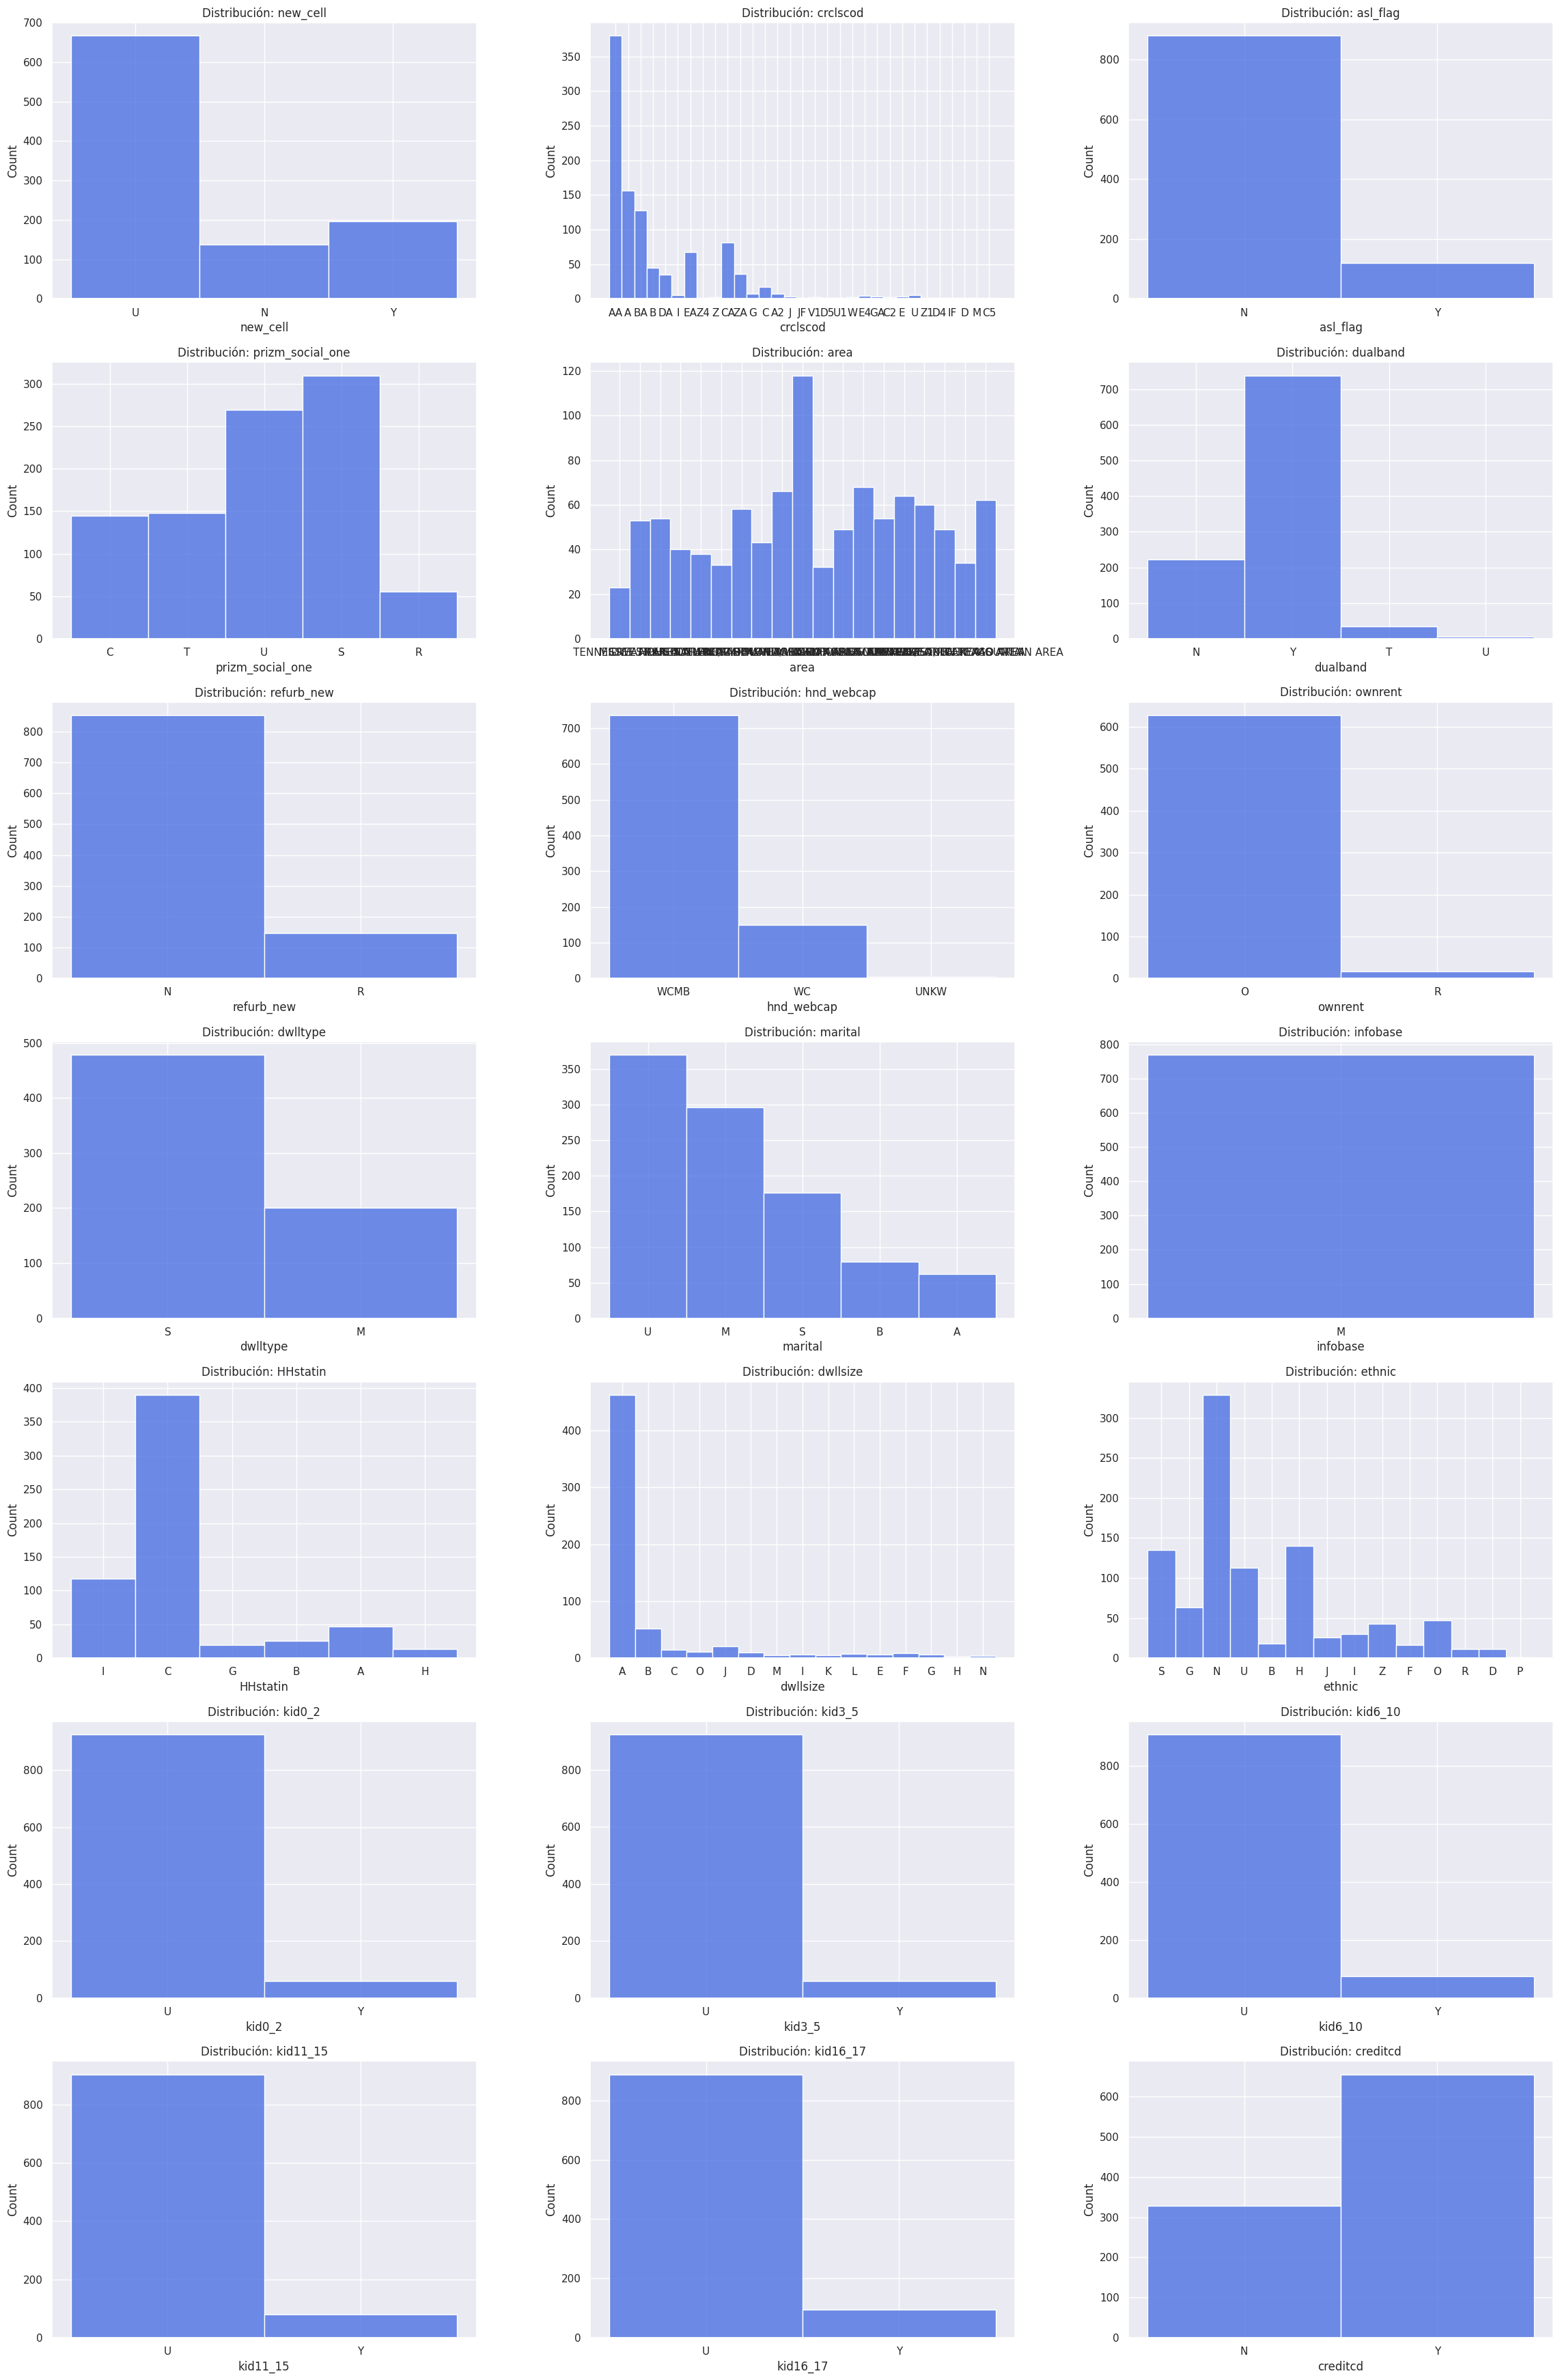

In [ ]:
num_cols = 3
num_plots = len(var_cat)
num_rows = (num_plots - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(23, num_rows * 5))

for i, var in enumerate(var_cat):
    row, col = i // num_cols, i % num_cols
    sns.histplot(x=var, data=df_sample, ax=axes[row, col], color = '#4169E1')
    axes[row, col].set_title('Distribución: ' + var)

plt.tight_layout()
plt.show()


### *Variables Numéricas*

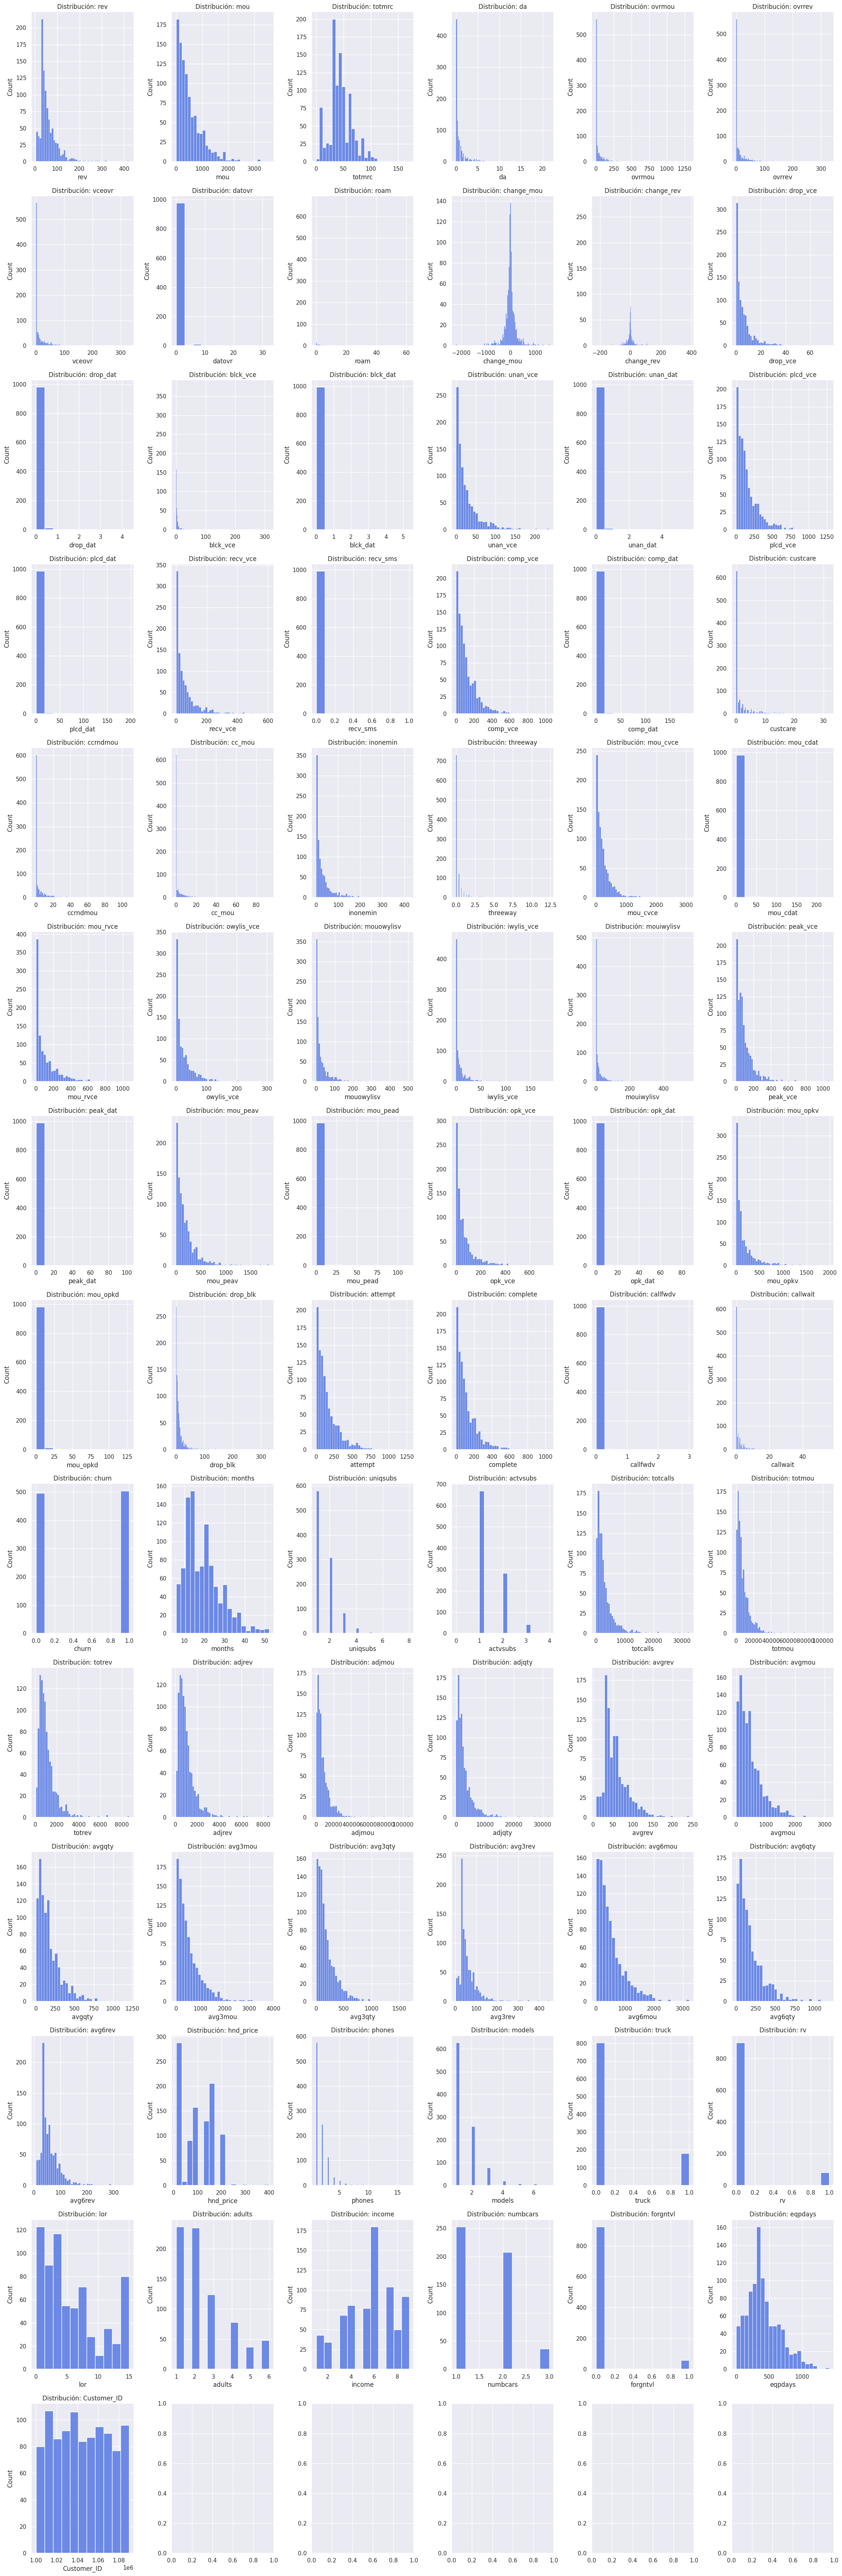

In [ ]:
num_cols = 6
num_plots = len(var_num)
num_rows = (num_plots - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(23, num_rows * 5))

for i, var in enumerate(var_num):
    row, col = i // num_cols, i % num_cols
    sns.histplot(x=var, data=df_sample, ax=axes[row, col], color ='#4169E1')
    axes[row, col].set_title('Distribución: ' + var)

plt.tight_layout()
plt.show()

## Analisis Variable-Target

* Relacion target-variable


*Variables categóricas y target*

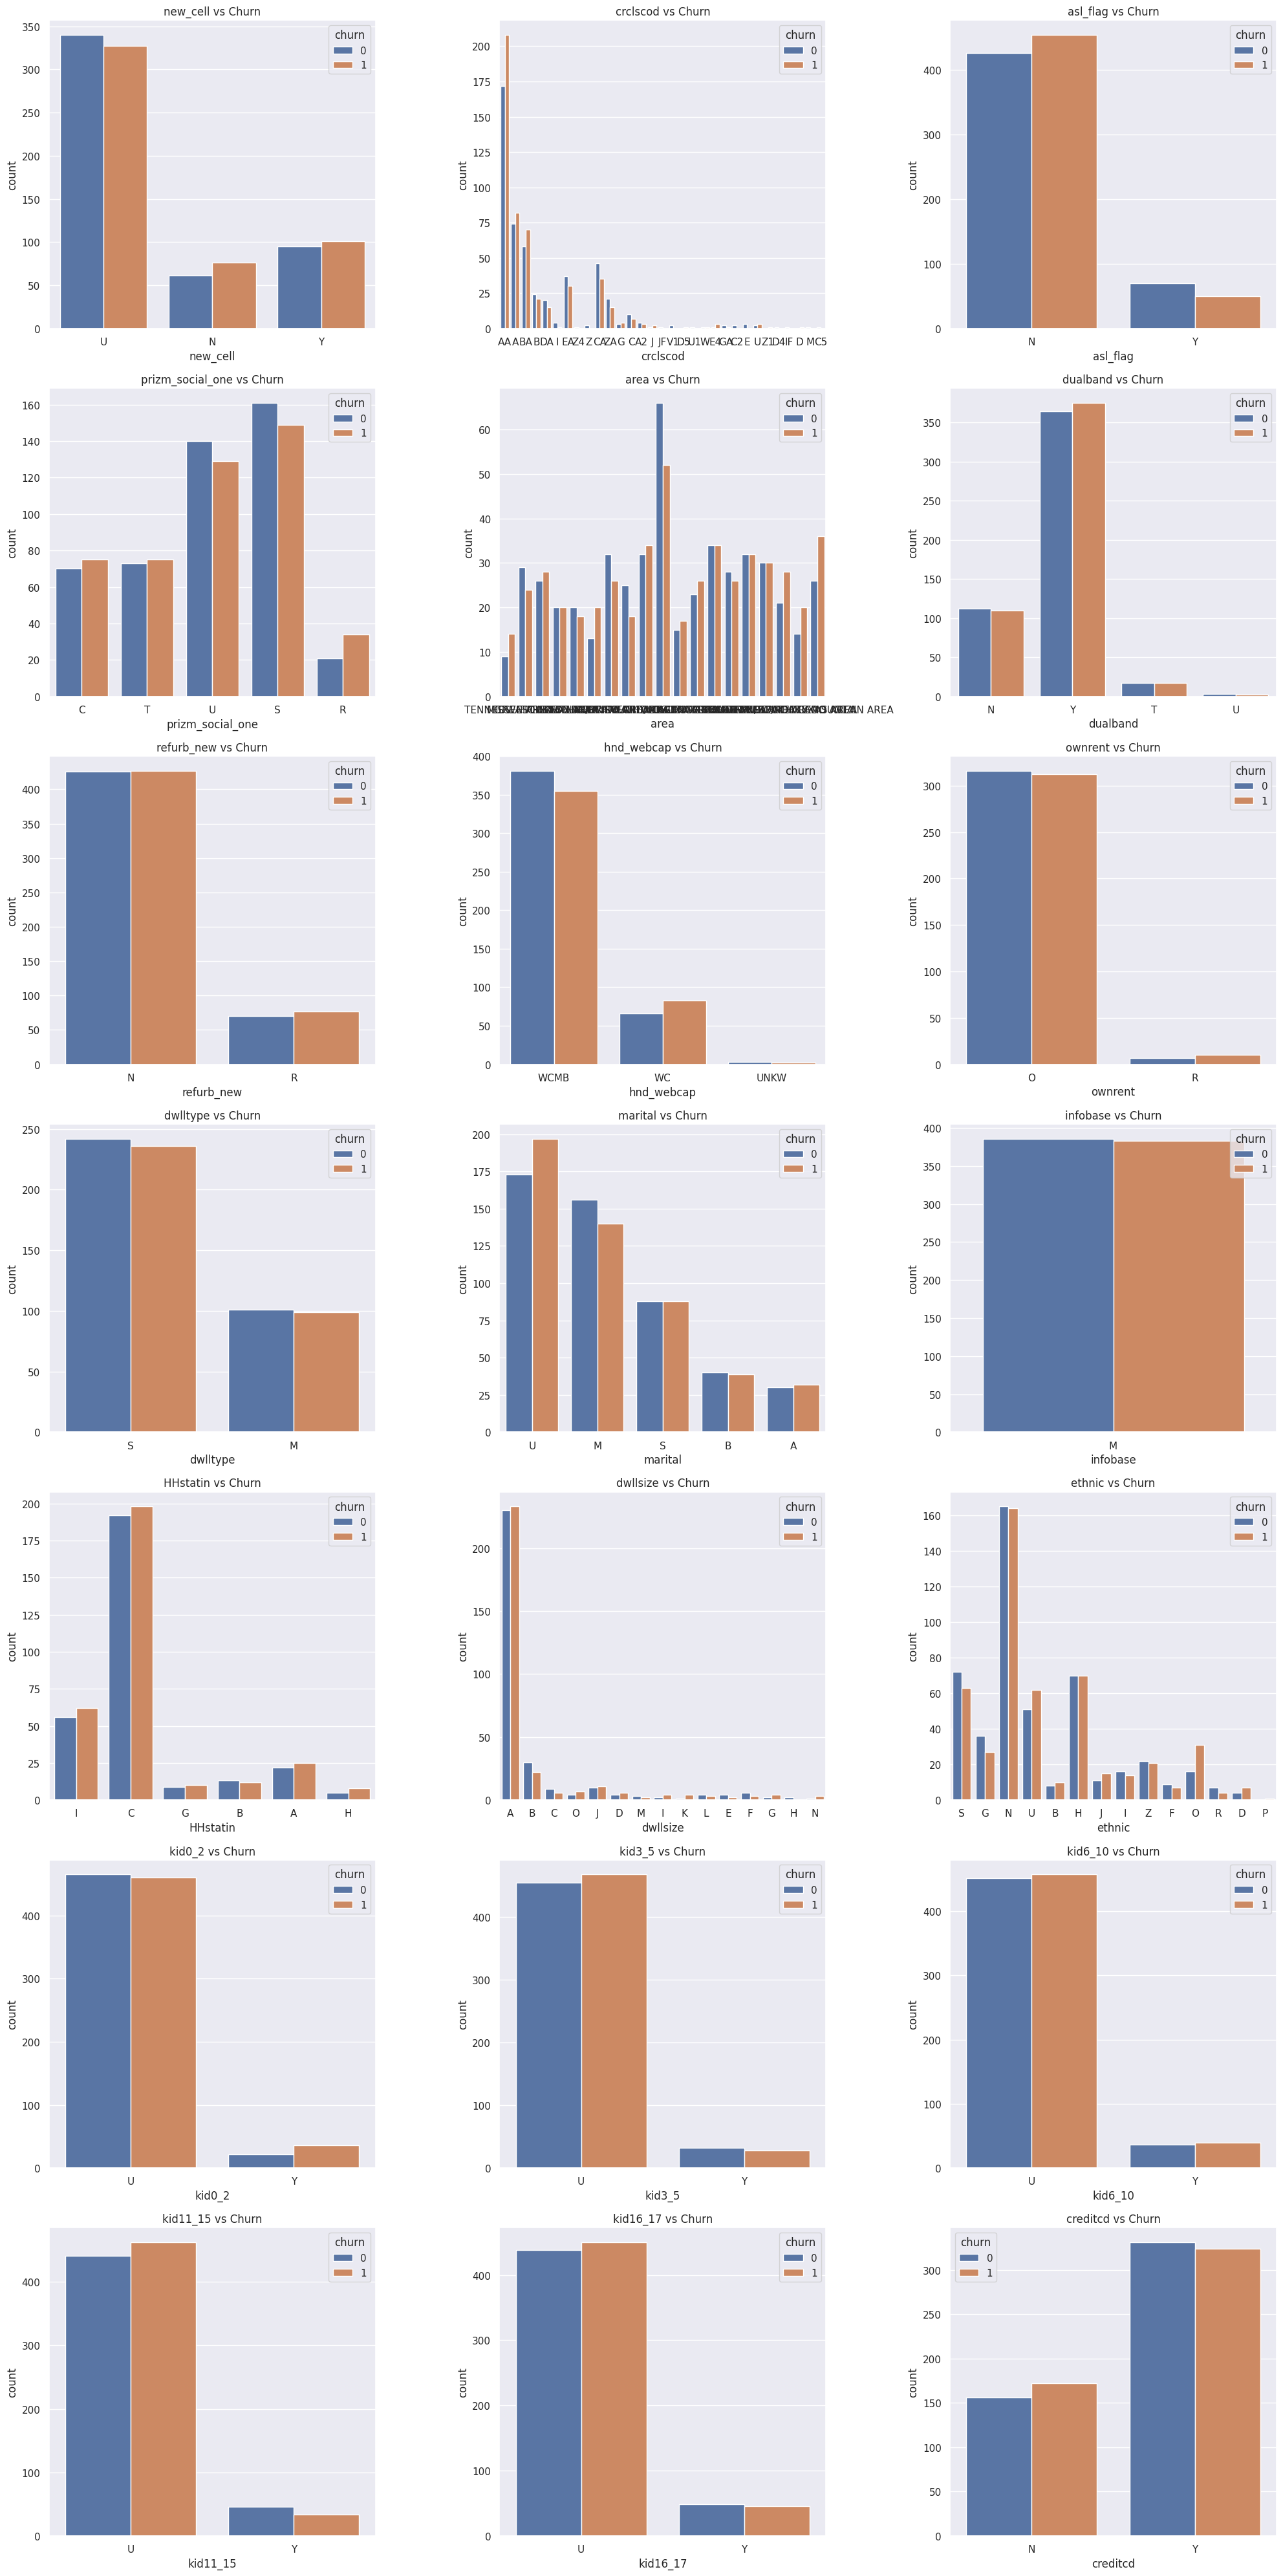

In [ ]:
n_rows = 7
n_cols = 3
sns.set()
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))

for i, var in enumerate(var_cat):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(x=var, hue='churn', data=df_sample, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs Churn')

plt.tight_layout()
plt.show()

*Variables numéricas y target*

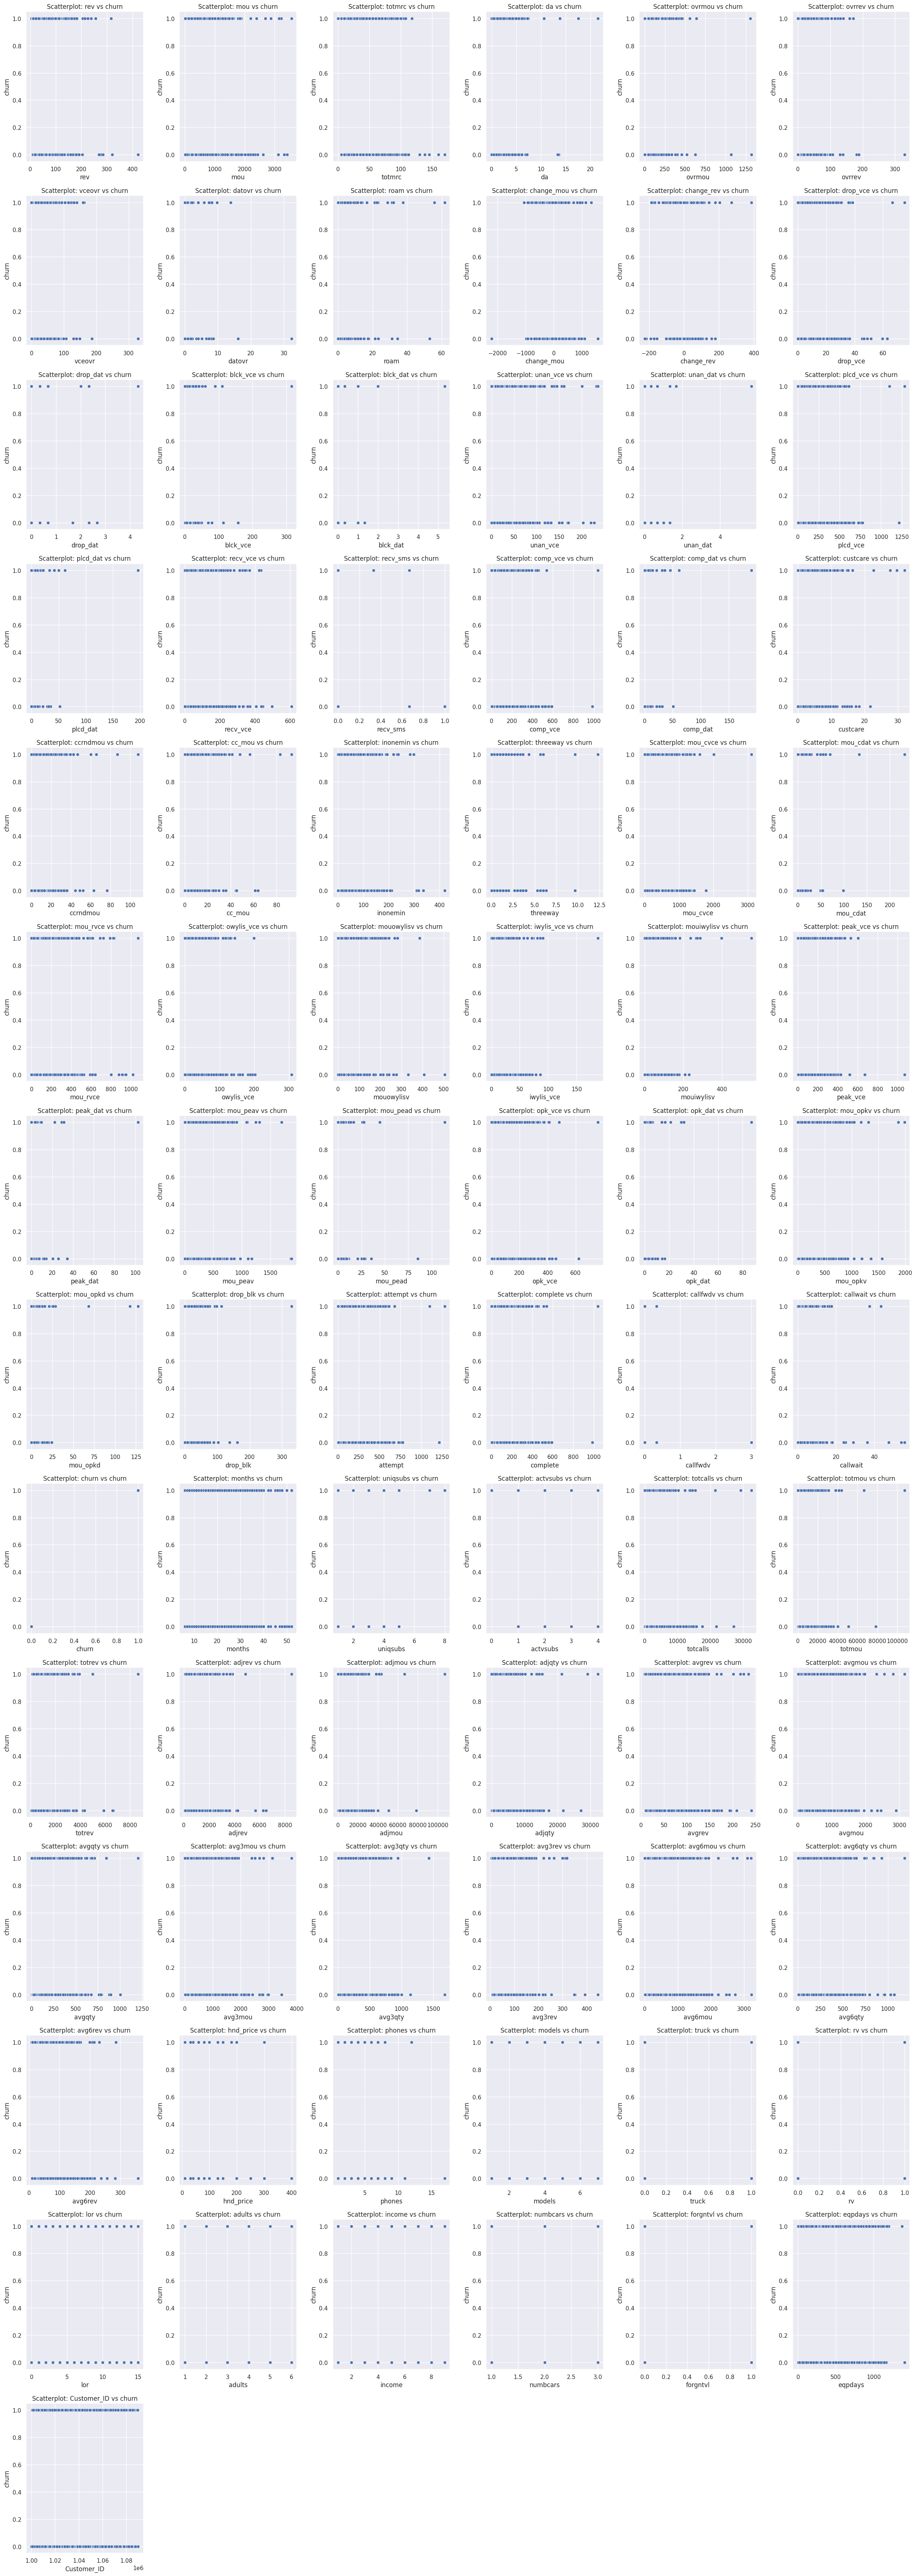

In [ ]:
num_cols = 6  # Puedes ajustar el número de columnas según tus preferencias
num_plots = len(var_num)
num_rows = (num_plots - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, num_rows * 5))

for i, var in enumerate(var_num):
    row, col = i // num_cols, i % num_cols
    sns.scatterplot(x=var, y='churn', data=df_sample, ax=axes[row, col])
    axes[row, col].set_title('Scatterplot: ' + var + ' vs churn')

# Elimina los subgráficos vacíos si es necesario
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

**Eliminar filas sin target informado.**

In [ ]:
# Filas sin target informado
print(df['churn'].isnull().sum(), ' non-informed rows in target were deleted')
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])

0  non-informed rows in target were deleted
N° Rows:  90000   Columns:  100


**Eliminar filas duplicadas**

In [ ]:
# Check duplicados
print(df.duplicated().sum(), 'duplicated rows were deleted')
df.drop_duplicates(inplace=True)
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])

0 duplicated rows were deleted
N° Rows:  90000   Columns:  100


**Cambiamos el index por customer_id**

In [ ]:
print(df['Customer_ID'].duplicated().sum(), ' duplicates in Customer_ID')

0  duplicates in Customer_ID


In [ ]:
df = df.set_index('Customer_ID')

In [ ]:
df.head(2)

rev     mou  totmrc      da  ovrmou  ovrrev  vceovr  datovr  \
Customer_ID                                                                    
1000001      23.9975  219.25  22.500  0.2475    0.00     0.0     0.0     0.0   
1000002      57.4925  482.75  37.425  0.2475   22.75     9.1     9.1     0.0   

             roam  change_mou  change_rev  drop_vce  drop_dat  blck_vce  \
Customer_ID                                                               
1000001       0.0     -157.25    -18.9975  0.666667       0.0  0.666667   
1000002       0.0      532.25     50.9875  8.333333       0.0  1.000000   

             blck_dat   unan_vce  unan_dat    plcd_vce  plcd_dat   recv_vce  \
Customer_ID                                                                   
1000001           0.0   6.333333       0.0   52.333333       0.0  42.333333   
1000002           0.0  61.333333       0.0  263.333333       0.0  69.000000   

             recv_sms    comp_vce  comp_dat  custcare  ccrndmou    cc_mou  \
Customer_ID                                                                 
1000001           0.0   45.000000       0.0  0.000000  0.000000  0.000000   
1000002           0.0  193.333333       0.0  1.666667  6.333333  5.463333   

             inonemin  threeway    mou_cvce  mou_cdat   mou_rvce  owylis_vce  \
Customer_ID                                                                    
1000001          18.0  0.000000   90.643333       0.0  97.176667    0.000000   
1000002          53.0  0.333333  189.396667       0.0  55.280000   46.333333   

             mouowylisv  iwylis_vce  mouiwylisv   peak_vce  peak_dat  \
Customer_ID                                                            
1000001        0.000000    0.000000    0.000000  58.000000       0.0   
1000002       24.216667    6.333333    3.696667  83.666667       0.0   

               mou_peav  mou_pead  opk_vce  opk_dat    mou_opkv  mou_opkd  \
Customer_ID                                                                 
1000001      132.600000       0.0     24.0      0.0   55.220000       0.0   
1000002       75.333333       0.0    157.0      0.0  169.343333       0.0   

             drop_blk     attempt    complete  callfwdv  callwait  churn  \
Customer_ID                                                                
1000001      1.333333   52.333333   45.000000       0.0  0.333333      1   
1000002      9.333333  263.333333  193.333333       0.0  5.666667      0   

             months  uniqsubs  actvsubs new_cell crclscod asl_flag  totcalls  \
Customer_ID                                                                    
1000001          61         2         1        U        A        N      1652   
1000002          56         1         1        N       EA        N     14654   

              totmou   totrev   adjrev   adjmou  adjqty  avgrev  avgmou  \
Customer_ID                                                               
1000001       4228.0  1504.62  1453.44   4085.0    1602   29.66   83.37   
1000002      26400.0  2851.68  2833.88  26367.0   14624   51.53  479.40   

             avgqty  avg3mou  avg3qty  avg3rev  avg6mou  avg6qty  avg6rev  \
Customer_ID                                                                 
1000001       32.69      272      116       30    322.0    136.0     38.0   
1000002      265.89      305      158       40    477.0    275.0     48.0   

            prizm_social_one                           area dualband  \
Customer_ID                                                            
1000001                    S  NORTHWEST/ROCKY MOUNTAIN AREA        Y   
1000002                    U                   CHICAGO AREA        N   

            refurb_new  hnd_price  phones  models hnd_webcap  truck   rv  \
Customer_ID                                                                
1000001              N  149.98999     2.0     2.0       WCMB    0.0  0.0   
1000002              N        NaN     7.0     6.0         WC    1.0  1.0   

            ownrent 

**Eliminar filas/columnas vacías y columnas irrelevantes**


In [ ]:
# Checkeamos la informacion de cada variable
for columna in df:
    # Obtener la descripción de la variable desde desc_vars
    descripcion = desc_vars.loc[desc_vars['Variable'] == columna, ' Description'].values[0]

    # Imprimir información
    print(f'Columna: {columna}')
    print(f'Descripción: {descripcion}')
    print(f'Valores únicos: {df[columna].unique()[:5]}')
    print(f'Tipo de datos: {df[columna].dtype}')
    print('----------------------------------------------------------------')

Columna: rev
Descripción:  Mean monthly revenue (charge amount)
Valores únicos: [23.9975 57.4925 16.99   38.     55.23  ]
Tipo de datos: float64
----------------------------------------------------------------
Columna: mou
Descripción:  Mean number of monthly minutes of use
Valores únicos: [219.25 482.75  10.25   7.5  570.5 ]
Tipo de datos: float64
----------------------------------------------------------------
Columna: totmrc
Descripción:  Mean total monthly recurring charge
Valores únicos: [22.5   37.425 16.99  38.    71.98 ]
Tipo de datos: float64
----------------------------------------------------------------
Columna: da
Descripción:  Mean number of directory assisted calls
Valores únicos: [0.2475 0.     1.2375 4.95   2.475 ]
Tipo de datos: float64
----------------------------------------------------------------
Columna: ovrmou
Descripción:  Mean overage minutes of use
Valores únicos: [  0.    22.75 419.5  249.5    6.  ]
Tipo de datos: float64
------------------------------------

**Eliminamos infobase ya que tiene 1 sólo valor único, no aporta nada al dataset**

In [ ]:
# Checkear columnas que tengan un valor único
list_unique=[]
for column in df.columns:
    unique_values = df[column].nunique(dropna=True)
    if unique_values == 1:
        list_unique.append(column)
        print(f"{column} has an unique value: {df[column].dropna().iloc[0]}")

infobase has an unique value: M


In [ ]:
# Eliminar columnas con valor único
df = df.drop(columns=list_unique)
print(f'Columns {list_unique} were deleted')

var_cat = df.select_dtypes(include=['object']).columns.tolist()
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])

Columns ['infobase'] were deleted
N° Rows:  90000   Columns:  98


**Eliminamos las siguientes columnas ya que no proporcionan información relevante que no podamos conseguir con otras columnas**

In [ ]:
# Las columnas avg3rev,avg3qty,avg3mou proporcionan la misma información y estas columnas empeoran el rendimiento del modelo
del(df['avg6rev'])
del(df['avg6qty'])
del(df['avg6mou'])

**Corregir data types incorrectos**

In [ ]:
# Para que todos los datos que entren (datos nuevos) tengan las mismas características, Eliminar los tildes:
df[var_cat] = df[var_cat].apply(lambda x: x.apply(lambda y: unidecode(y) if isinstance(y, str) else y))
print('Accent mark deleted', '\n')

# Transformar todos los str a letras mayúsculas
df[var_cat] = df[var_cat].apply(lambda x: x.str.upper() if x.dtype == 'O' else x)
print('Transformed to uppercase', '\n')

# Eliminar ' area' al final de cada string en la columna area
df['area'] = df['area'].str.replace(' AREA', '')
print('AREA word removed', '\n')

# Cambiar 'UNKW' por 'UNKNOWN', ya que este será un valor a imputar en nulos posteriormente
df['hnd_webcap'] = df['hnd_webcap'].replace('UNKW','UNKNOWN')
print('UNKNOWN instead UNKW in hnd_webcap category', '\n')

# Reemplazar la categoría 'T' por 'U' en la variable dualband
df['dualband'] = df['dualband'].str.replace('T', 'U')
print('U instead T in dualband category', '\n')

Accent mark deleted 

Transformed to uppercase 

AREA word removed 

UNKNOWN instead UNKW in hnd_webcap category 

U instead T in dualband category 



**Agrupamos las columnas kids**

In [ ]:
# Se agrupan las columnas kids in num_kids
list_to_kids=['kid0_2','kid3_5','kid6_10','kid11_15','kid16_17']
for i in list_to_kids:
    df[i] = df[i].replace({'U': 0, 'Y': 1})

df['num_kids'] = df['kid0_2'] + df['kid3_5'] + df['kid6_10'] + df['kid11_15'] + df['kid16_17']
drop_cols = list(set(list_to_kids))
df.drop(columns=drop_cols, inplace=True)

print(f'Columns removed: {drop_cols}')
print(f"Column created: ['num_kids']")

Columns removed: ['kid11_15', 'kid3_5', 'kid6_10', 'kid0_2', 'kid16_17']
Column created: ['num_kids']


**Agrupar categorías en variables categóricas**

In [ ]:
# Agrupar categorias en las variables categoricas
list_to_group = ['ethnic','crclscod']
for i in list_to_group:
    counts = df[i].value_counts(dropna=True)
    categorias_a_agrupar = counts[counts < 3000].index
    df[i] = df[i].apply(lambda x: 'OTHER' if x in categorias_a_agrupar and not pd.isna(x) else x)
    print(f'This categories were grouped for {i}: {categorias_a_agrupar}')

This categories were grouped for ethnic: Index(['J', 'F', 'B', 'R', 'D', 'M', 'P', 'X'], dtype='object')
This categories were grouped for crclscod: Index(['C', 'A2', 'U', 'E', 'E4', 'GA', 'D', 'G', 'I', 'JF', 'Z', 'J', 'M',
       'C2', 'D4', 'Z4', 'K', 'W', 'V1', 'U1', 'EM', 'B2', 'Y', 'EC', 'O',
       'CY', 'E2', 'CC', 'D5', 'C5', 'IF', 'ZY', 'Z1', 'Z5', 'H', 'TP', 'D2',
       'GY', 'L', 'EF', 'Z2', 'A3', 'P1', 'S', 'V', 'ZF'],
      dtype='object')


**Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)**

In [ ]:
# Checkear si hay columnas que tienen formato datatime
encontradas = False
for columna in df.columns:
    if df[columna].dtype == 'datetime':
        print(f"Column '{columna}' is datetime format.")
        encontradas = True
if not encontradas:
    print("No columns with datetime format were found")

No columns with datetime format were found


**Actualizar listas de variables**

In [ ]:
# Actualizar listas de variables
var_cat = df.select_dtypes(include=['object']).columns.tolist()
var_num = df.select_dtypes(include=['int','float']).columns.tolist()
print('Total var_cat:', len(var_cat))

for i in var_cat:
    print(df[i].value_counts())

Total var_cat: 15
U    58812
Y    18114
N    13074
Name: new_cell, dtype: int64
AA       34152
A        15602
BA       11270
CA        7389
OTHER     5945
EA        5521
B         3743
DA        3201
ZA        3177
Name: crclscod, dtype: int64
N    79401
Y    10599
Name: asl_flag, dtype: int64
S    29203
U    20935
C    15244
T    13705
R     4376
Name: prizm_social_one, dtype: int64
NEW YORK CITY               10293
DC/MARYLAND/VIRGINIA         5924
MIDWEST                      5891
ATLANTIC SOUTH               5526
CALIFORNIA NORTH             5476
DALLAS                       5106
NEW ENGLAND                  5090
SOUTHWEST                    5006
CHICAGO                      4762
LOS ANGELES                  4556
GREAT LAKES                  4276
OHIO                         4260
NORTHWEST/ROCKY MOUNTAIN     4013
NORTH FLORIDA                3996
CENTRAL/SOUTH TEXAS          3962
HOUSTON                      3887
SOUTH FLORIDA                3119
TENNESSEE                    2554
P

# Imputación de nulos

* Es preferible imputar un valor a los outliers, ya que vamos a practicar un Torneo de Modelos y es un Modelo de árboles.

*Ver porcentaje de nulos de cada variable*

In [ ]:
null_percentage  = df.isnull().sum()/len(df)
print(f'{len(null_percentage[null_percentage > 0])} Columns with null values')
null_percentage[null_percentage > 0].sort_values(ascending=False)

35 Columns with null values


numbcars            0.484089
dwllsize            0.375156
HHstatin            0.367022
ownrent             0.327678
dwlltype            0.310867
lor                 0.294467
income              0.246622
adults              0.222589
hnd_webcap          0.105767
prizm_social_one    0.072633
num_kids            0.016122
marital             0.016122
truck               0.016122
rv                  0.016122
forgntvl            0.016122
ethnic              0.016122
creditcd            0.016122
hnd_price           0.007822
change_mou          0.006611
change_rev          0.006611
rev                 0.001489
mou                 0.001489
roam                0.001489
datovr              0.001489
vceovr              0.001489
ovrrev              0.001489
ovrmou              0.001489
da                  0.001489
totmrc              0.001489
area                0.000444
phones              0.000011
refurb_new          0.000011
dualband            0.000011
eqpdays             0.000011
models        

**Nulos en Variables Categóricas**

In [ ]:
null_percentage_cat  = df[var_cat].isnull().sum()/len(df[var_cat])
print(f'{len(null_percentage_cat[null_percentage_cat > 0])} Columns with null values')
null_percentage_cat[null_percentage_cat > 0].sort_values(ascending=False)

12 Columns with null values


dwllsize            0.375156
HHstatin            0.367022
ownrent             0.327678
dwlltype            0.310867
hnd_webcap          0.105767
prizm_social_one    0.072633
marital             0.016122
ethnic              0.016122
creditcd            0.016122
area                0.000444
dualband            0.000011
refurb_new          0.000011
dtype: float64

In [ ]:
# Descripción de variables categóricas
pd.set_option('display.max_rows', None)
desc_vars[desc_vars['Variable'].isin(var_cat)]

Variable                          Description
52          new_cell                  New cell phone user
53          crclscod                    Credit class code
54          asl_flag               Account spending limit
70  prizm_social_one             Social group letter only
71              area                      Geogrpahic area
72          dualband                             Dualband
73        refurb_new          Handset: refurbished or new
77        hnd_webcap               Handset web capability
80           ownrent             Home owner/renter status
82          dwlltype                   Dwelling Unit type
83           marital                       Marital Status
88          HHstatin   Premier household status indicator
89          dwllsize                        Dwelling size
91            ethnic               Ethnicity roll-up code
97          creditcd                Credit card indicator

**Columnas con 'U' en vez de 'UNKNOWN'**

In [ ]:
# cambiamos el formato para que coincida con la nueva imputación de nulos
varcat_null_to_U = ['new_cell','dualband']

for i in varcat_null_to_U:
  df[i] = df[i].replace('U', 'UNKNOWN')

  print(i, "\n", df[i].value_counts(), "\n")

new_cell 
 UNKNOWN    58812
Y          18114
N          13074
Name: new_cell, dtype: int64 

dualband 
 Y          65977
N          20418
UNKNOWN     3604
Name: dualband, dtype: int64 



In [ ]:
# Se imputan los nulos como 'UNKNOWN'
var_cat = df.select_dtypes(include=['object']).columns.tolist()
for i in var_cat:
    df[i].fillna('UNKNOWN', inplace=True)

print(f'{len(var_cat)} Null values transformed to UNKNOWN')

15 Null values transformed to UNKNOWN


In [ ]:
for i in var_cat:
    print(df[i].value_counts(),'\n')

UNKNOWN    58812
Y          18114
N          13074
Name: new_cell, dtype: int64 

AA       34152
A        15602
BA       11270
CA        7389
OTHER     5945
EA        5521
B         3743
DA        3201
ZA        3177
Name: crclscod, dtype: int64 

N    79401
Y    10599
Name: asl_flag, dtype: int64 

S          29203
U          20935
C          15244
T          13705
UNKNOWN     6537
R           4376
Name: prizm_social_one, dtype: int64 

NEW YORK CITY               10293
DC/MARYLAND/VIRGINIA         5924
MIDWEST                      5891
ATLANTIC SOUTH               5526
CALIFORNIA NORTH             5476
DALLAS                       5106
NEW ENGLAND                  5090
SOUTHWEST                    5006
CHICAGO                      4762
LOS ANGELES                  4556
GREAT LAKES                  4276
OHIO                         4260
NORTHWEST/ROCKY MOUNTAIN     4013
NORTH FLORIDA                3996
CENTRAL/SOUTH TEXAS          3962
HOUSTON                      3887
SOUTH FLORIDA 

**Nulos en Variables Numéricas**

In [ ]:
# Check Valores nulos
porcentaje_nulos = (df[(df.columns[df.isnull().any()])].isnull().sum() / len(df)) * 100
print(f'{len(porcentaje_nulos)} Columns with null values')
df[var_num].isnull().sum()[df[var_num].isnull().sum()>0].sort_values(ascending=False)

23 Columns wirh null values


numbcars      43568
lor           26502
income        22196
adults        20033
num_kids       1451
truck          1451
forgntvl       1451
rv             1451
hnd_price       704
change_mou      595
change_rev      595
mou             134
roam            134
datovr          134
vceovr          134
ovrrev          134
ovrmou          134
da              134
totmrc          134
rev             134
phones            1
models            1
eqpdays           1
dtype: int64

In [ ]:
# numbcars: 43568 nulos, no hay opcion para cuando se tiene 0 autos, asi que es posible que los nulos hagan referencia a 0 cars
df['numbcars'].fillna(0, inplace = True)

**Observamos los datos numericos para ver si imputar -999 en los nulos realmente será un outlier**

In [ ]:
var_num = df.select_dtypes(include=['int', 'float']).columns.tolist()
tabla_filas = []

# Iterar sobre las variables numéricas
for columna in var_num:
    minimo = df[columna].min()
    if minimo < 0:
        maximo = df[columna].max()
        tabla_filas.append([columna, maximo, minimo])

# Crear DataFrame con los resultados
df_resultado = pd.DataFrame(tabla_filas, columns=['Variable', 'Máximo', 'Mínimo'])
df_resultado.T

0       1           2           3        4
Variable        rev  totmrc  change_mou  change_rev  eqpdays
Máximo    3843.2625  409.99    31219.25   9963.6575   1812.0
Mínimo      -5.8625 -26.915     -3875.0    -1107.74     -5.0

In [ ]:
# Las columnas numéricas se reemplazan con -9999 para poder ser outlier
for i in var_num:
   df[i].fillna(-9999, inplace = True)

print(f'{len(porcentaje_nulos)} columns with null values were updated. Null values were replaced by -9999')

23 columns with null values were updated. Null values were replaced by -9999


In [ ]:
# Valores nulos
porcentaje_nulos = (df[(df.columns[df.isnull().any()])].isnull().sum() / len(df)) * 100
print(f'{len(porcentaje_nulos)} Columns with null values')

0 Columns with null values


# Encoding categóricos

In [ ]:
var_cat = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
for columna in var_cat:
    # Obtener la descripción de la variable desde desc_vars
    descripcion = desc_vars.loc[desc_vars['Variable'] == columna, ' Description'].values[0]

    # Imprimir información
    print(f'Columna: {columna}')
    print(f'Descripción: {descripcion}')
    print(f'Valores únicos: {df[columna].unique()}')
    print('----------------------------------------------------------------')

Columna: new_cell
Descripción:  New cell phone user
Valores únicos: ['UNKNOWN' 'N' 'Y']
----------------------------------------------------------------
Columna: crclscod
Descripción:  Credit class code
Valores únicos: ['A' 'EA' 'OTHER' 'B' 'BA' 'CA' 'AA' 'DA' 'ZA']
----------------------------------------------------------------
Columna: asl_flag
Descripción:  Account spending limit
Valores únicos: ['N' 'Y']
----------------------------------------------------------------
Columna: prizm_social_one
Descripción:  Social group letter only
Valores únicos: ['S' 'U' 'T' 'C' 'UNKNOWN' 'R']
----------------------------------------------------------------
Columna: area
Descripción:  Geogrpahic area
Valores únicos: ['NORTHWEST/ROCKY MOUNTAIN' 'CHICAGO' 'GREAT LAKES' 'NEW ENGLAND' 'DALLAS'
 'CENTRAL/SOUTH TEXAS' 'TENNESSEE' 'MIDWEST' 'PHILADELPHIA' 'OHIO'
 'HOUSTON' 'SOUTHWEST' 'NEW YORK CITY' 'ATLANTIC SOUTH' 'SOUTH FLORIDA'
 'CALIFORNIA NORTH' 'DC/MARYLAND/VIRGINIA' 'NORTH FLORIDA' 'UNKNOWN'
 

**ORDNIAL ENCODING**

*Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.*

In [ ]:
l_oe = ['prizm_social_one','dwllsize']

In [ ]:
encoder = OrdinalEncoder()

# Ajustar y transformar la columna 'nivel_educativo'
df[l_oe] = encoder.fit_transform(df[l_oe])

**INDICADOR BOOLEANO**

In [ ]:
# Mapeo para 'asl_flag'
mapeo_asl = {'N': 0, 'Y': 1}
df['asl_flag'] = df['asl_flag'].replace(mapeo_asl)
print(f"Unique values for asl_flag: {df['asl_flag'].unique()}")

# Mapeo para 'new_cell'
mapeo_newcell = {'N': 0, 'Y': 1, 'UNKNOWN': -9999}
df['new_cell'] = df['new_cell'].replace(mapeo_newcell)
print(f"Unique values for new_cell: {df['new_cell'].unique()}")

# Mapeo para 'dualband'
mapeo_dualband = {'N': 0, 'Y': 1, 'UNKNOWN': -9999}
df['dualband'] = df['dualband'].replace(mapeo_dualband)
print(f"Unique values for dualband: {df['dualband'].unique()}")

# Mapeo para 'creditcd'
mapeo_creditcd = {'N': 0, 'Y': 1, 'UNKNOWN': -9999}
df['creditcd'] = df['creditcd'].replace(mapeo_creditcd)
print(f"Unique values for creditcd: {df['creditcd'].unique()}")


Unique values for asl_flag: [0 1]
Unique values for new_cell: [-9999     0     1]
Unique values for dualband: [    1     0 -9999]
Unique values for creditcd: [    1     0 -9999]


In [ ]:
# Actualizar variables en numérica y categóricas
var_cat = df.select_dtypes(include=['object']).columns.tolist()
var_num = df.select_dtypes(include=['int', 'float']).columns.tolist()
print('Total var_cat:', len(var_cat), '   Total var_num:', len(var_num), '    Total variables:', len(var_cat)+len(var_num))

Total var_cat: 9    Total var_num: 82     Total variables: 91


In [ ]:
var_cat

['crclscod',
 'area',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'dwlltype',
 'marital',
 'HHstatin',
 'ethnic']

**ONE HOT ENCODING**

In [ ]:
# onehotencoding
df = pd.get_dummies(df, columns=var_cat)
print('Rows: ', df.shape[0], '  Columns: ', df.shape[1])

Rows:  90000   Columns:  146


In [ ]:
df.head(1)

rev     mou  totmrc      da  ovrmou  ovrrev  vceovr  datovr  \
Customer_ID                                                                    
1000001      23.9975  219.25    22.5  0.2475     0.0     0.0     0.0     0.0   

             roam  change_mou  change_rev  drop_vce  drop_dat  blck_vce  \
Customer_ID                                                               
1000001       0.0     -157.25    -18.9975  0.666667       0.0  0.666667   

             blck_dat  unan_vce  unan_dat   plcd_vce  plcd_dat   recv_vce  \
Customer_ID                                                                 
1000001           0.0  6.333333       0.0  52.333333       0.0  42.333333   

             recv_sms  comp_vce  comp_dat  custcare  ccrndmou  cc_mou  \
Customer_ID                                                             
1000001           0.0      45.0       0.0       0.0       0.0     0.0   

             inonemin  threeway   mou_cvce  mou_cdat   mou_rvce  owylis_vce  \
Customer_ID                                                                   
1000001          18.0       0.0  90.643333       0.0  97.176667         0.0   

             mouowylisv  iwylis_vce  mouiwylisv  peak_vce  peak_dat  mou_peav  \
Customer_ID                                                                     
1000001             0.0         0.0         0.0      58.0       0.0     132.6   

             mou_pead  opk_vce  opk_dat  mou_opkv  mou_opkd  drop_blk  \
Customer_ID                                                             
1000001           0.0     24.0      0.0     55.22       0.0  1.333333   

               attempt  complete  callfwdv  callwait  churn  months  uniqsubs  \
Customer_ID                                                                     
1000001      52.333333      45.0       0.0  0.333333      1      61         2   

             actvsubs  new_cell  asl_flag  totcalls  totmou   totrev   adjrev  \
Customer_ID                                                                     
1000001             1     -9999         0      1652  4228.0  1504.62  1453.44   

             adjmou  adjqty  avgrev  avgmou  avgqty  avg3mou  avg3qty  \
Customer_ID                                                             
1000001      4085.0    1602   29.66   83.37   32.69      272      116   

             avg3rev  prizm_social_one  dualband  hnd_price  phones  models  \
Customer_ID                                                                   
1000001           30               2.0         1  149.98999     2.0     2.0   

             truck   rv   lor  adults  income  numbcars  dwllsize  forgntvl  \
Customer_ID                                                                   
1000001        0.0  0.0  15.0     1.0     4.0       3.0       0.0       0.0   

             creditcd  eqpdays  num_kids  crclscod_A  crclscod_AA  crclscod_B  \
Customer_ID                                                                     
1000001             1    361.0       0.0           1            0           0   

             crclscod_BA  crclscod_CA  crclscod_DA  crclscod_EA  \
Customer_ID                                                       
1000001                0            0            0            0   

             crclscod_OTHER  crclscod_ZA  area_ATLANTIC SOUTH  \
Customer_ID                                                     
1000001                   0            0                    0   

             area_CALIFORNIA NORTH  area_CENTRAL/SOUTH TEXAS  area_CHICAGO  \
Customer_ID                                                                  
1000001                          0                         0             0   

             area_DALLAS  area_DC/MARYLAND/VIRGINIA  area_GREAT LAKES  \
Customer_ID                                                             
1000001                0                          0                 0   

             area_HOUSTON  area_LOS ANGELES  area_MIDWEST  area_NEW ENGLAND  \
Customer_ID                         

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [ ]:
corr = df.corr(numeric_only = True)

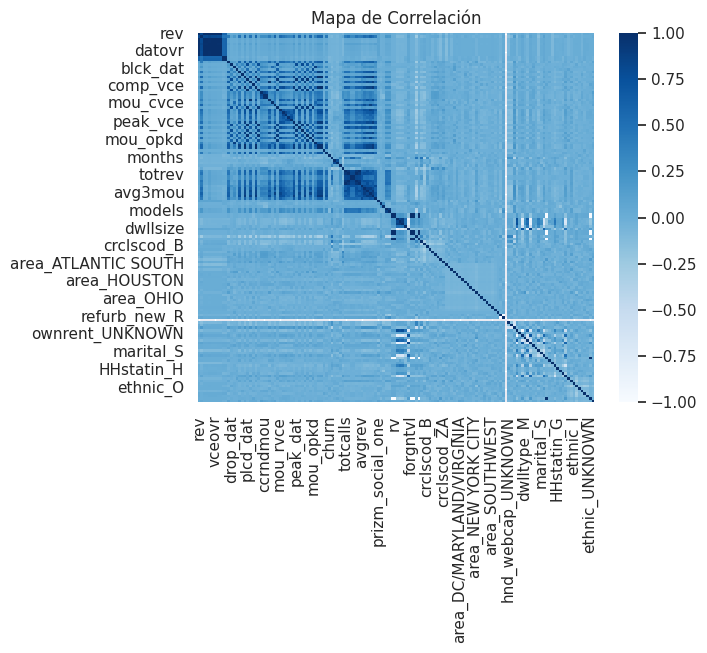

In [ ]:
df_sample=df.sample(1000, random_state=42)
correlation_matrix = df_sample.corr()
sns.heatmap(correlation_matrix, cmap='Blues', vmin=-1, vmax=1, annot=False)
plt.title('Mapa de Correlación')
plt.show()

In [ ]:
#Set target
target = 'churn'
features = df.columns[df.columns!=target]
X = df[features]
y = df[target]

In [ ]:
# Eliminar variables altamente correlacionadas
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z.loc[Z['corr_F1_target'] < Z['corr_F2_target'], 'F_to_delete'] = Z.loc[Z['corr_F1_target'] < Z['corr_F2_target'], 'F1']

    return Z

In [ ]:
highly_corr = highly_correlated(X,y,0.95)
highly_corr

F1               F2  corr_F1_F2  corr_F1_target  \
0               totmrc              rev    0.995490        0.037891   
1                   da              rev    0.993272        0.033995   
2                   da           totmrc    0.998275        0.033995   
3               ovrmou              rev    0.985311        0.028923   
4               ovrmou           totmrc    0.971250        0.028923   
5               ovrmou               da    0.970471        0.028923   
6               ovrrev              rev    0.997087        0.032136   
7               ovrrev           totmrc    0.995933        0.032136   
8               ovrrev               da    0.997077        0.032136   
9               ovrrev           ovrmou    0.985207        0.032136   
10              vceovr              rev    0.997034        0.032145   
11              vceovr           totmrc    0.995997        0.032145   
12              vceovr               da    0.997156        0.032145   
13              vceovr           ovrmou    0.984997        0.032145   
14              vceovr           ovrrev    0.999970        0.032145   
15              datovr              rev    0.993125        0.033890   
16              datovr           totmrc    0.998172        0.033890   
17              datovr               da    0.999955        0.033890   
18              datovr           ovrmou    0.970333        0.033890   
19              datovr           ovrrev    0.997055        0.033890   
20              datovr           vceovr    0.997074        0.033890   
21                roam              rev    0.994067        0.033524   
22                roam           totmrc    0.997504        0.033524   
23                roam               da    0.999201        0.033524   
24                roam           ovrmou    0.969694        0.033524   
25                roam           ovrrev    0.996301        0.033524   
26                roam           vceovr    0.996378        0.033524   
27                roam           datovr    0.999179        0.033524   
28          change_rev       change_mou    0.959990        0.058099   
29            comp_vce         plcd_vce    0.985686        0.050651   
30            comp_dat         plcd_dat    0.990591        0.007206   
31              cc_mou         ccrndmou    0.988749        0.032771   
32            inonemin         recv_vce    0.965997        0.033247   
33            mou_opkd         mou_cdat    0.960178        0.008218   
34             attempt         plcd_vce    0.998551        0.047133   
35             attempt         comp_vce    0.984313        0.047133   
36            complete         plcd_vce    0.983671        0.050721   
37            complete         comp_vce    0.997889        0.050721   
38            complete          attempt    0.985763        0.050721   
39              adjrev           totrev    0.998538        0.020232   
40              adjmou           totmou    0.999780        0.028345   
41              adjqty         totcalls    0.999825        0.026333   
42              models           phones    0.999802        0.001913   
43                  rv            truck    1.000000        0.003069   
44            forgntvl            truck    1.000000        0.003069   
45            forgntvl               rv    1.000000        0.003069   
46            creditcd            truck    1.000000        0.003061   
47            creditcd               rv    1.000000        0.003061   
48            creditcd         forgntvl    1.000000        0.003061   
49            num_kids            truck    1.000000        0.003072   
50            num_kids               rv    1.000000        0.003072   
51            num_kids         forgntvl    1.000000        0.003072   
52            num_kids         creditcd    1.000000        0.003072   
53        refurb_new_R     refurb_new_N    0.999956        0.029593   
54  refurb_new_UNKNOWN           phones    0.999218        0.003393   
55  refurb_new_UNKNOWN           models    0

In [ ]:
# Eliminamos las features altamente correlacionadas
drop_cols = list(set(highly_corr['F_to_delete']))
df.drop(columns=drop_cols, inplace=True)
print(f'Eliminadas {len(drop_cols)} columnas altamente correlacionadas:{drop_cols}')
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])

Eliminadas 28 columnas altamente correlacionadas:['forgntvl', 'truck', 'cc_mou', 'totmou', 'models', 'vceovr', 'rev', 'creditcd', 'da', 'comp_dat', 'mou_opkd', 'roam', 'inonemin', 'change_rev', 'rv', 'ethnic_UNKNOWN', 'totrev', 'refurb_new_N', 'comp_vce', 'phones', 'datovr', 'ownrent_UNKNOWN', 'attempt', 'marital_UNKNOWN', 'plcd_vce', 'ovrrev', 'totcalls', 'ovrmou']
N° Rows:  90000   Columns:  118


# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
target = 'churn'
features = df.columns[df.columns!=target]
X = df[features]
y = df[target]

# Eliminamos columnas practicamente constantes (nula varianza)
vt = VarianceThreshold(threshold = 0.01)#0.01 es el umbral minimo de varianza y filtra las varianzas inferiores
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
df.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])

3  low variance features were removed:
 ['area_UNKNOWN', 'refurb_new_UNKNOWN', 'HHstatin_H']
N° Rows:  90000   Columns:  115


In [ ]:
columnas_ordenadas = ['churn'] + [columna for columna in df.columns if columna != 'churn']
df3 = df[columnas_ordenadas]

corr = df.corr(numeric_only = True)
corr.style.background_gradient(cmap='Oranges')

# Guardar clean data

In [ ]:
# Identificar columnas eliminadas y nuevas
columnas_eliminadas = [col for col in df_inicial.columns if col not in df.columns]
columnas_nuevas = [col for col in df.columns if col not in df_inicial.columns]

# Imprimir las listas de columnas eliminadas y nuevas
print("Columnas eliminadas:",len(columnas_eliminadas), columnas_eliminadas)
print("Columnas nuevas:", len(columnas_nuevas), columnas_nuevas)

Columnas eliminadas: 43 ['rev', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_rev', 'plcd_vce', 'comp_vce', 'comp_dat', 'cc_mou', 'inonemin', 'mou_opkd', 'attempt', 'crclscod', 'totcalls', 'totmou', 'totrev', 'avg6mou', 'avg6qty', 'avg6rev', 'area', 'refurb_new', 'phones', 'models', 'hnd_webcap', 'truck', 'rv', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'Customer_ID']
Columnas nuevas: 58 ['num_kids', 'crclscod_A', 'crclscod_AA', 'crclscod_B', 'crclscod_BA', 'crclscod_CA', 'crclscod_DA', 'crclscod_EA', 'crclscod_OTHER', 'crclscod_ZA', 'area_ATLANTIC SOUTH', 'area_CALIFORNIA NORTH', 'area_CENTRAL/SOUTH TEXAS', 'area_CHICAGO', 'area_DALLAS', 'area_DC/MARYLAND/VIRGINIA', 'area_GREAT LAKES', 'area_HOUSTON', 'area_LOS ANGELES', 'area_MIDWEST', 'area_NEW ENGLAND', 'area_NEW YORK CITY', 'area_NORTH FLORIDA', 'area_NORTHWEST/ROCKY MOUNTAIN', 'area_OHIO', 'area_PHILADELPHIA', '

* Guardar en data path y mostrar el resultado en un head()

In [ ]:
df.head(5)

mou  totmrc  change_mou  drop_vce  drop_dat  blck_vce  \
Customer_ID                                                             
1000001      219.25  22.500     -157.25  0.666667       0.0  0.666667   
1000002      482.75  37.425      532.25  8.333333       0.0  1.000000   
1000003       10.25  16.990       -4.25  0.333333       0.0  0.000000   
1000004        7.50  38.000       -1.50  0.000000       0.0  0.000000   
1000005      570.50  71.980       38.50  9.666667       0.0  0.666667   

             blck_dat   unan_vce  unan_dat  plcd_dat   recv_vce  recv_sms  \
Customer_ID                                                                 
1000001           0.0   6.333333       0.0       0.0  42.333333       0.0   
1000002           0.0  61.333333       0.0       0.0  69.000000       0.0   
1000003           0.0   2.666667       0.0       0.0   0.333333       0.0   
1000004           0.0   0.000000       0.0       0.0   1.333333       0.0   
1000005           0.0  77.000000       0.0       0.0  94.666667       0.0   

             custcare   ccrndmou  threeway    mou_cvce  mou_cdat    mou_rvce  \
Customer_ID                                                                    
1000001      0.000000   0.000000  0.000000   90.643333       0.0   97.176667   
1000002      1.666667   6.333333  0.333333  189.396667       0.0   55.280000   
1000003      0.000000   0.000000  0.000000    5.426667       0.0    0.000000   
1000004      0.000000   0.000000  0.000000    8.410000       0.0    0.413333   
1000005      8.666667  15.000000  0.000000  285.233333       0.0  106.330000   

             owylis_vce  mouowylisv  iwylis_vce  mouiwylisv   peak_vce  \
Customer_ID                                                              
1000001        0.000000    0.000000    0.000000    0.000000  58.000000   
1000002       46.333333   24.216667    6.333333    3.696667  83.666667   
1000003        0.000000    0.000000    0.000000    0.000000   5.000000   
1000004        0.333333    0.256667    0.000000    0.000000   1.333333   
1000005       14.666667   10.816667    0.666667    0.366667  97.333333   

             peak_dat    mou_peav  mou_pead     opk_vce  opk_dat    mou_opkv  \
Customer_ID                                                                    
1000001           0.0  132.600000       0.0   24.000000      0.0   55.220000   
1000002           0.0   75.333333       0.0  157.000000      0.0  169.343333   
1000003           0.0    5.193333       0.0    1.000000      0.0    0.233333   
1000004           0.0    3.380000       0.0    3.666667      0.0    5.450000   
1000005           0.0  173.476667       0.0   90.333333      0.0  218.086667   

              drop_blk    complete  callfwdv  callwait  churn  months  \
Customer_ID                                                             
1000001       1.333333   45.000000       0.0  0.333333      1      61   
1000002       9.333333  193.333333       0.0  5.666667      0      56   
1000003       0.333333    6.000000       0.0  0.000000      1      58   
1000004       0.000000    3.666667       0.0  0.000000      0      60   
1000005      10.333333  137.000000       0.0  0.000000      0      57   

             uniqsubs  actvsubs  new_cell  asl_flag   adjrev    adjmou  \
Customer_ID                                                              
1000001             2         1     -9999         0  1453.44   4085.00   
1000002             1         1         0         0  2833.88  26367.00   
1000003             1         1         1         0  1934.47  24303.05   
1000004             1         1         1         0  1941.81   3035.00   
1000005             1         1         1         0  2166.48  13965.00   

             adjqty  avgrev  avgmou  avgqty  avg3mou  avg3qty  avg3rev  \
Customer_ID                                                              
1000001        1602   29.66   83.37   32.69      272      116       30   
1000002       14624   51.53  479.40  265.89      305      158       40

In [ ]:
df.shape

(90000, 115)

In [ ]:
df.to_csv('/content/drive/MyDrive/DSC N°1123 - Entregable 2 - Julià_Tizzard_Quenti/data/final_df_clean.csv')